In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#The Boston Housing Dataset is a derived from information collected by the U.S. 
#Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's
#from the above discription of Columns :
#inputs are [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
#output is [MEDV]

In [3]:
#Load dataset BostonHousing.csv file
df=pd.read_csv("BostonHousing.csv")

In [4]:
#to see first 5 records
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#to see the null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

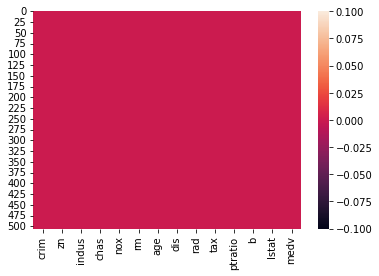

In [6]:
#to see the null values in visualize form
sb.heatmap(df.isnull())
plt.show()

In [7]:
#to see the no of rows and cols
df.shape

(506, 14)

In [8]:
#to see the datatypes
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

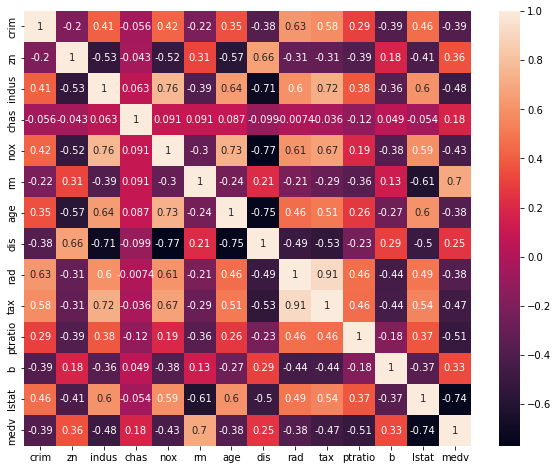

In [9]:
#to see the co relation
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
#we can see input cols indus nox tax ptratio lstat are imp as they are corelated with output
#corelation should be more then 0.5 or close to -0.5

In [11]:
#feature selection
col=df[['crim','zn','chas','age','dis','rad','b']] #select those col which are to be dropped 
df.drop(col,axis=1,inplace=True)
df.head()

,indus,nox,rm,tax,ptratio,lstat,medv
0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,7.07,0.469,6.421,242,17.8,9.14,21.6
2,7.07,0.469,7.185,242,17.8,4.03,34.7
3,2.18,0.458,6.998,222,18.7,2.94,33.4
4,2.18,0.458,7.147,222,18.7,5.33,36.2


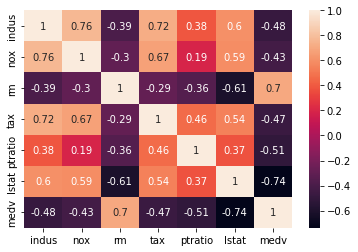

In [12]:
#to see the co relation
sb.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
#we can see lstat is co related with every other input , means there is multi colinearity , so we ll remove the cols whose 
#corelation with output is not imp 
#we see lstat is the only imp input , every other is not imp or co related with lstat 

In [14]:
#feature selection
col=df[['indus','nox','rm','tax','ptratio',]] #select those col which are to be dropped 
df.drop(col,axis=1,inplace=True)
df.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [15]:
#our multi colinearity is solved i.e assumption 1

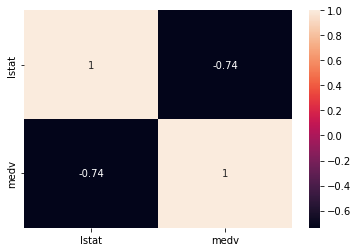

In [16]:
#to see the co relation
sb.heatmap(df.corr(),annot=True)
plt.show()
#linear relation satisfied

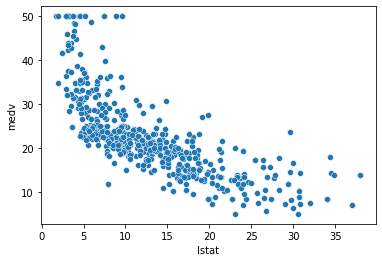

In [17]:
#use scatterplot to see hetroskedastic or homoskedastic
sb.scatterplot(data=df,x='lstat',y='medv')
plt.show()

In [18]:
#select input and output
X=df[['lstat']]
Y=df['medv']

In [19]:
X

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [20]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [21]:
#to split
from sklearn.model_selection import train_test_split

In [22]:
#train_test_split
#create object of train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
#to apply scaling 
from sklearn.preprocessing import StandardScaler
#create object
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
X_train

array([[-0.64691635],
       [ 0.20337764],
       [ 1.13897622],
       [-1.18901317],
       [-0.8037667 ],
       [-0.71983801],
       [ 0.23364701],
       [-0.47080368],
       [-1.29220419],
       [-1.05555279],
       [-0.880816  ],
       [ 0.37673856],
       [ 0.15659772],
       [-0.00438027],
       [-0.9083336 ],
       [ 1.47606688],
       [ 0.58174471],
       [-0.85880191],
       [-0.36761266],
       [ 0.7014463 ],
       [ 0.59412764],
       [-0.9991417 ],
       [ 0.24740581],
       [-0.74597973],
       [-0.86430543],
       [-0.1282095 ],
       [-1.54536616],
       [-0.5739947 ],
       [ 1.16924558],
       [-0.65517164],
       [ 1.13622446],
       [-0.59876054],
       [ 1.59576846],
       [ 0.25428521],
       [-0.38687499],
       [-0.87806424],
       [-0.51483185],
       [ 0.19374648],
       [ 0.37811444],
       [ 0.71107746],
       [ 0.00525089],
       [ 0.06578962],
       [-0.6991998 ],
       [ 0.23915053],
       [-1.15186441],
       [-0

In [25]:
X_test

array([[-0.74735561],
       [-0.79551142],
       [ 0.80326144],
       [-0.66893044],
       [-0.38137146],
       [-0.2534146 ],
       [-1.13672972],
       [ 0.01075441],
       [ 0.68218397],
       [-0.57124294],
       [-0.71846213],
       [-1.14911265],
       [ 0.08917958],
       [-0.37449206],
       [-0.17086179],
       [-0.11445069],
       [ 1.41415227],
       [-1.14636089],
       [-0.76111441],
       [ 2.27958095],
       [-0.20113115],
       [ 0.50744718],
       [-0.50657657],
       [-0.94135473],
       [-1.14085737],
       [ 1.5723785 ],
       [ 1.015147  ],
       [-0.33459154],
       [-0.78450438],
       [ 1.08531689],
       [-1.02803518],
       [ 0.75648151],
       [-1.38713993],
       [ 0.4785537 ],
       [-0.53271829],
       [ 0.08642782],
       [ 0.66429753],
       [-1.05004927],
       [ 1.42791107],
       [ 0.27767518],
       [-0.77349734],
       [-0.85467427],
       [-0.73772445],
       [ 1.53247797],
       [ 0.69731866],
       [ 1

In [26]:
#model perform with lr algo
from sklearn.linear_model import LinearRegression

In [27]:
#create object of lr 
lr=LinearRegression()

In [28]:
#to train model , we use fit()
lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
#check slope 
m=lr.coef_
print('slope : ',m)
#check intercept
c=lr.intercept_
print('intercept : ',c)

slope :  [-6.66258272]
intercept :  22.339830508474574


In [30]:
#to test model with 30% data , we use predict()
Y_pred=lr.predict(X_test)
Y_pred

array([27.31914909, 27.63999115, 16.98803475, 26.79663488, 24.88074943,
       24.02822625, 29.91338632, 22.26817837, 17.79472336, 26.14578384,
       27.12664386, 29.99588857, 21.74566416, 24.83491485, 23.47821128,
       23.10236773, 12.91792404, 29.97755474, 27.41081825,  7.15193387,
       23.67988344, 18.95892169, 25.71493879, 28.61168425, 29.94088707,
       11.8637287 , 15.57632968, 24.56907429, 27.56665583, 15.10881697,
       29.18919996, 17.29970989, 31.58176504, 19.15142693, 25.8891102 ,
       21.76399799, 17.91389327, 29.33587062, 12.82625488, 20.48979666,
       27.4933205 , 28.03416854, 27.25498068, 12.12956926, 17.69388728,
       13.37626984, 32.46178898, 19.23392917, 25.22909224, 24.47740513,
       23.53321278, 23.93655709, 29.44587361, 24.04656008,  7.01443013,
       28.05250237,  6.74858956, 28.74002108, 20.77397106, 30.60090503,
       20.453129  , 28.23584069, 15.96134016, 18.05139701,  7.13360004,
       29.60171118, 31.9576086 , 26.2924545 , 24.6882442 , 23.55

In [31]:
#to compare Y_pred and Y_test
#create a dict
dict={'Actual output':Y_test,'Predicted output':Y_pred}
#convert into df1
df1=pd.DataFrame(dict)
#to add new col X_test 
df1['Input']=X_test
df1.head()

,Actual output,Predicted output,Input
307,28.2,27.319149,-0.747356
343,23.9,27.639991,-0.795511
47,16.6,16.988035,0.803261
67,22.0,26.796635,-0.668930
362,20.8,24.880749,-0.381371


In [32]:
#evaluation of model 
#find mse
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print('mean_squared_error : ',mse)

mean_squared_error :  42.620243471539716


In [33]:
#to find root_mean_squared_error
rmse=np.sqrt(mse)
print('root_mean_squared_error : ',rmse)

root_mean_squared_error :  6.528418144661057


In [34]:
#to check accuracy , we use r2_score
from sklearn.metrics import r2_score
print("r2_score : ",r2_score(Y_test,Y_pred))

r2_score :  0.5349901044757203


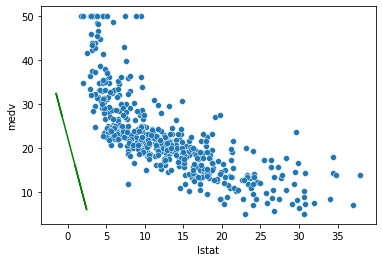

In [36]:
#to visualize and see the best fit line that machine made
sb.scatterplot(data=df,x='lstat',y='medv')
plt.plot(X_test,Y_pred,c='green') 

# second method : Regularization

In [38]:
df.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [40]:
#Load dataset BostonHousing.csv file
df=pd.read_csv("BostonHousing.csv")

In [42]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
#to see the null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [46]:
#to see dtypes
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [48]:
#select input and output
X=df.drop('medv',axis=1)
Y=df['medv']

In [50]:
#to check medv dropped or not 
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [54]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [56]:
X_train.shape,X_test.shape

((354, 13), (152, 13))

In [59]:
#apply StandardScaler on X_train and X_test
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [61]:
X_train

array([[-0.36571739, -0.48366069, -0.46209575, ...,  1.18880212,
         0.43987709, -0.64691635],
       [-0.4195265 ,  0.58018848, -0.90151022, ...,  0.58247746,
         0.231398  ,  0.20337764],
       [ 0.71430973, -0.48366069,  0.99191363, ...,  0.81567925,
         0.43987709,  1.13897622],
       ...,
       [ 0.25011703, -0.48366069,  0.99191363, ...,  0.81567925,
         0.43987709,  0.88168661],
       [-0.40087863, -0.48366069, -0.74530641, ..., -0.49025077,
         0.21666488, -0.28643573],
       [-0.43028363, -0.48366069, -0.78034278, ...,  0.34927567,
         0.43987709, -0.57674646]])

In [63]:
X_test

array([[-0.43390418,  0.92062021, -1.33216561, ..., -0.02384719,
         0.43987709, -0.74735561],
       [-0.43671065,  1.85680748, -1.09858981, ..., -0.39697005,
         0.43987709, -0.79551142],
       [-0.41276468, -0.48366069, -0.64165714, ..., -0.25704898,
         0.39379457,  0.80326144],
       ...,
       [-0.42877408, -0.48366069,  2.09409945, ...,  0.30263532,
         0.23150877,  0.68355985],
       [-0.37624897,  0.36741864, -1.07085268, ..., -2.54242652,
         0.39445922, -0.46392428],
       [-0.32358288, -0.48366069, -0.46209575, ...,  1.18880212,
         0.41373412,  0.9518565 ]])

In [68]:
#train model using LinearRegression
from sklearn.linear_model import LinearRegression
#create object 
lr=LinearRegression()
#train data
lr.fit(X_train,Y_train)

LinearRegression()

In [70]:
dict={'column':X.columns,'slope_lr':lr.coef_}
df1=pd.DataFrame(dict)
df1

,column,slope_lr
0,crim,-0.838843
1,zn,1.428401
2,indus,0.405327
3,chas,0.679425
4,nox,-2.530391
5,rm,1.933816
6,age,0.100907
7,dis,-3.236154
8,rad,2.703183
9,tax,-1.917299


In [72]:
#check intercept
lr.intercept_

22.339830508474574

In [75]:
#test the model
Y_pred=lr.predict(X_test)
Y_pred

array([32.3914647 , 27.94401279, 17.83762764, 21.66941388, 18.93639614,
       20.01995795, 32.63414961, 17.86179976, 24.73211676, 26.77346826,
       27.26138023, 28.63243014, 21.16103038, 27.15098589, 23.33198614,
       21.02894005, 17.11819755, 37.52455938, 30.69864427,  8.46104486,
       20.83966032, 16.26732451, 25.05030307, 24.8069032 , 31.6789299 ,
       10.98989363, 13.54111562, 16.54697099, 35.86699683, 14.69589266,
       21.05655107, 13.90301353, 43.01321262, 17.80335305, 21.68817023,
       20.45077825, 17.38095983, 26.81334904, 10.08706217, 19.96174586,
       24.1983249 , 21.00202622, 29.38682967, 16.33215467, 19.37439646,
       14.45525235, 39.52670798, 18.18535021, 26.38536303, 20.41420863,
       25.08511581, 24.40208165, 24.87902769, 26.97887956,  4.93921657,
       24.0001365 , 10.66711602, 26.98494775, 16.63507993, 35.31652989,
       19.49249915, 27.37577863, 16.53965715, 19.09746715, 11.06765336,
       32.03445261, 36.15847648, 21.53547868, 24.96434626, 25.50

In [77]:
#to see mse and r2score
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
r2s=r2_score(Y_test,Y_pred)
print('mean_squared_error: ',mse)
print('r2_score: ',r2s)

mean_squared_error:  19.831323672063125
r2_score:  0.7836295385076293


In [78]:
#r2_score is good but not the best

In [80]:
#check overfit or not 
#first find training score
train_score=lr.score(X_train,Y_train)
print("Training score: ",train_score)
#find testing score
test_score=lr.score(X_test,Y_test)
print("Testing score: ",test_score)

Training score:  0.7103879080674731
Testing score:  0.7836295385076293


In [81]:
#since training is score is less then testing score , our model is underfit 

In [82]:
#training score>testing score : then model is overfit , apply regularisation
#to reduced overfitting
#but training score<testing score , then model is underfit so apply
#cross validation after train the model

In [84]:
#apply cross validation 
from sklearn.model_selection import cross_val_score

In [87]:
#to create object
lr_score=cross_val_score(lr,X_train,Y_train,cv=5)
lr_score

array([0.49928471, 0.79566051, 0.60481958, 0.71988078, 0.70189495])

In [89]:
#to see mean/avg
lr_score.mean() #testing score

0.6643081077199131

In [90]:
#training score - 71 , testing score - 66

In [92]:
#check variance
#find the residual
#residual=Y_pred-Y_test
#to find Y_pred
Y_pred=lr.predict(X_test)

In [94]:
residual=Y_pred-Y_test
residual

307    4.191465
343    4.044013
47     1.237628
67    -0.330586
362   -1.863604
         ...   
467   -1.770041
95    -0.039766
122    0.294228
260   -0.101843
23    -0.981173
Name: medv, Length: 152, dtype: float64

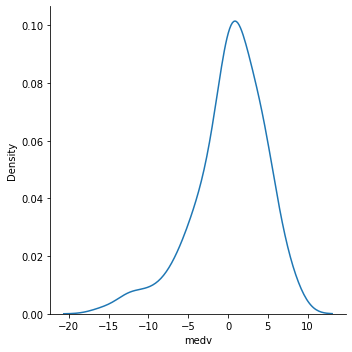

In [96]:
sb.displot(residual,kind='kde') #kde means to only see distribution curve
plt.show()

In [100]:
#to see mse 
#to create object
mse=cross_val_score(lr,X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
mse #shown in negative cz we used neg keyword as to minimize error

array([-34.12809475, -17.98990088, -27.47132784, -28.45214047,
       -22.01184618])

In [101]:
#find the mean of mse
mse.mean()

-26.010662023166237